In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# put these in your sbatch script, before launching jupyter

# module load gcc/8.3.0
# module load nixpkgs/16.09
# module load cudacore/.10.1.243
# module load cudnn/7.6.5

In [3]:
# This won't be necessary if you have loaded the modules before starting the job:
import os
os.environ['CUDA_HOME'] = "/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/cudacore/10.1.243/"

In [ ]:
!python train.py --wandb '../GSCNN/data/AerialImageDataset/train' '../datasets/'

d: 1.3153; c: 1.3593 g: 1.0069; g_cooccur: 0.7450; recon: 0.1593; r1: 0.0054; r1

In [5]:
import os
import torch
import numpy as np
from PIL import Image
from torch.utils import data
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torch import nn, autograd, optim
from stylegan2.datasets.cityscapes import Cityscapes
from stylegan2.datasets.inria import INRIA
from stylegan2.datasets.wami import WAMI

In [35]:
datasets = []
path_1 = '../maskgan/data/cityscapes/'
path_2 = '../GSCNN/data/AerialImageDataset/train'

dataset = INRIA(path_2)
datasets.append(dataset)
# dataset = WAMI(path_1)
# datasets.append(dataset)

# n_gpu = int(os.environ["WORLD_SIZE"]) if "WORLD_SIZE" in os.environ else 1
# distributed_val = n_gpu > 1
    
# def data_sampler(dataset, shuffle, distributed):
#     if distributed:
#         return data.distributed.DistributedSampler(dataset, shuffle=shuffle)

#     if shuffle:
#         return data.RandomSampler(dataset)
#     else:
#         return data.SequentialSampler(dataset)
    
# final_dataset = data.ConcatDataset(datasets)

# loader = data.DataLoader(
#             final_dataset,
#             batch_size=8,
#             sampler=data_sampler(final_dataset, shuffle=True, distributed=distributed_val),
#             drop_last=True,
#         )

In [10]:
# real_img = next(loader)

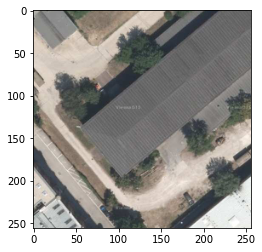

In [47]:
plt.imshow(np.transpose((dataset[100]+1)*0.5, (1, 2, 0)))

In [2]:
import os
print(os.environ.get('CUDA_PATH'))

None


In [ ]:
! git checkout cityscape_experiment

In [ ]:
-m torch.distributed.launch 

In [10]:
# Image.MAX_IMAGE_PIXELS = 933120000

path =  '../datasets/'

In [44]:
test_wami = WAMI(path)

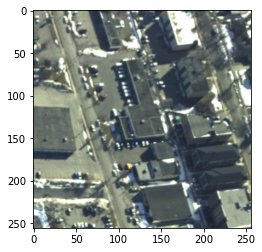

In [45]:
plt.imshow(np.transpose((test_wami[5]+1)*0.5, (1, 2, 0)))

In [12]:
! nvidia-smi

Mon Feb 15 19:22:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 455.45.01    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:18:00.0 Off |                    0 |
| N/A   32C    P0    40W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:3B:00.0 Off |                    0 |
| N/A   